# Crypto Currency Trading Algorithms in Python

In [1]:
! pip install python-binance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 496.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Using cached websockets-14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (168 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.9 MB/s eta 0:00:0000:0100:01
  Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl (14 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached frozenlist-1.5.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (274 kB)
  Using cached multidict-6.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (129 kB)
  Using cached propcache-0.2.0-cp311-cp311-manylinux_2_17_x

In [14]:
#!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 738.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 699.5 kB/s eta 0:00:0000:0100:01
  Using cached pillow-11.0.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.4 MB)
  Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


## 1. Import Libraries

In [15]:
# Import necessary libraries
import os
import json
#import yfinance as yf
from binance.client import Client

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

print("Libraries loaded successfully!")


Libraries loaded successfully!


This cell imports libraries for data fetching (`binanceAPI`), data manipulation (`pandas`, `numpy`), and visualization (`matplotlib`).

## 2. Fetch Cryptocurrency Data

In [18]:
# Define the data path
DATA_PATH = "BTC-USDT.json"

# Define Binance API keys as environment variables
api_key = os.getenv('BINANCE_API_KEY')
api_secret = os.getenv('BINANCE_API_SECRET')

# Initialize Binance client
client = Client(api_key, api_secret)

# Function to fetch and save BTC-USDT historical data
def fetch_btc_usdt_data():
    if not os.path.exists(DATA_PATH):
        # Fetch historical Klines data (candle data)
        klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2017")
        
        # Transform data into a structured format
        data = [
            {
                "timestamp": int(kline[0]),
                "open": float(kline[1]),
                "high": float(kline[2]),
                "low": float(kline[3]),
                "close": float(kline[4]),
                "volume": float(kline[5])
            }
            for kline in klines
        ]
        
        # Save as JSON
        with open(DATA_PATH, 'w') as f:
            json.dump(data, f)
    else:
        print(f"Data already exists at {DATA_PATH}")

# Load data into pandas DataFrame
def load_btc_usdt_data():
    with open(DATA_PATH, 'r') as f:
        data = json.load(f)
    df =  pd.DataFrame(data)

    # Convert timestamp to datetime in milliseconds
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = df[['date', 'open', 'high', 'low', 'close', 'volume']]  # Reorder columns
    df.set_index('date', inplace=True) # Set the 'date' column as the index
    return df

# Main execution
if __name__ == "__main__":
    fetch_btc_usdt_data()
    BTC_USDT = load_btc_usdt_data()
    print(BTC_USDT.head())


Data already exists at BTC-USDT.json
               open     high      low    close       volume
date                                                       
2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


This fetches daily historical data for Bitcoin fro, 2017 to 2024. The data includes `Open`, `High`, `Low`, `Close`, and `Volume` columns.

## 3. Data Exploration

In [19]:
# Check dataset information
BTC_USDT.info()

# Display basic statistics
BTC_USDT.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2657 entries, 2017-08-17 to 2024-11-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2657 non-null   float64
 1   high    2657 non-null   float64
 2   low     2657 non-null   float64
 3   close   2657 non-null   float64
 4   volume  2657 non-null   float64
dtypes: float64(5)
memory usage: 124.5 KB


,open,high,low,close,volume
count,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000
mean,26007.303233,26645.811889,25329.773560,26042.688927,68576.097197
std,20509.920692,20980.959594,20043.296591,20553.277366,80550.876337
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,8462.000000,8684.410000,8142.030000,8465.940000,28373.517586
50%,19795.340000,20189.000000,19278.600000,19803.300000,43761.643110
75%,41025.010000,42200.000000,39751.000000,41114.000000,71962.931540
max,98892.000000,99588.010000,97620.740000,98892.000000,760705.362783


The `.info()` method verifies data completeness, while `.describe()` provides summary statistics like mean and standard deviation.

## 4. Create a Price Chart

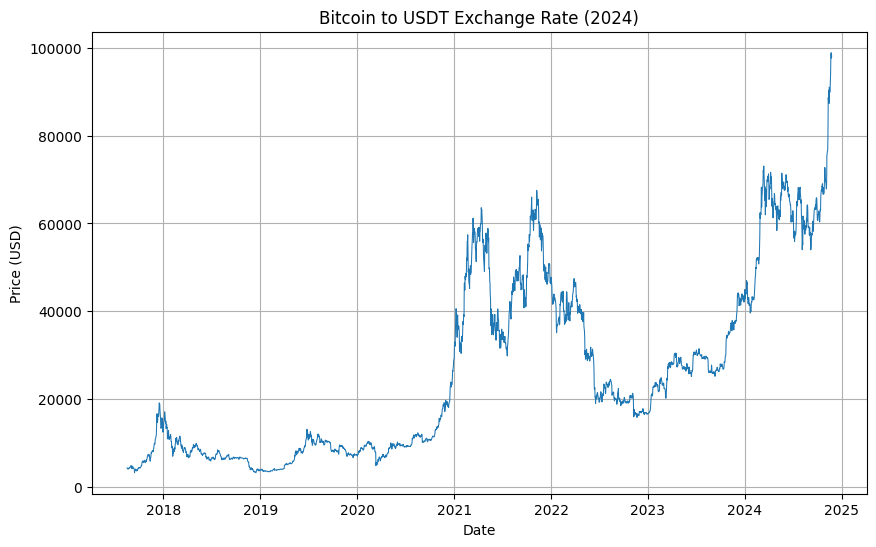

In [20]:
# Visualize closing prices
plt.figure(figsize=(10, 6))
plt.plot(BTC_USDT['close'], label='Closing Price', lw=0.75)
plt.title('Bitcoin to USDT Exchange Rate (2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()


A line chart helps identify overall trends and fluctuations in Bitcoin prices over 2024.

## 5. Calculate Moving Averages

In [21]:
# Compute 9-day and 30-day Simple Moving Averages
BTC_USDT['SMA_9'] = BTC_USDT['close'].rolling(window=9).mean()
BTC_USDT['SMA_30'] = BTC_USDT['close'].rolling(window=30).mean()

# Display the updated dataset
BTC_USDT.tail()


,open,high,low,close,volume,SMA_9,SMA_30
date,,,,,,,
2024-11-20,92310.80,94831.97,91500.00,94286.56,42203.198712,90465.467778,77404.473000
2024-11-21,94286.56,98988.00,94040.00,98317.12,69228.360477,91617.146667,78434.177000
2024-11-22,98317.12,99588.01,97122.11,98892.00,46189.309243,92563.457778,79508.288667
2024-11-23,98892.00,98908.85,97136.00,97672.40,24757.843670,93713.103333,80490.759333
2024-11-24,97672.40,98400.00,97620.74,98134.69,1932.830960,94502.283333,81538.638000


Moving Averages smooth short-term fluctuations and reveal longer-term trends. The `rolling` method calculates these averages efficiently.

## 6. Visualize Moving Averages

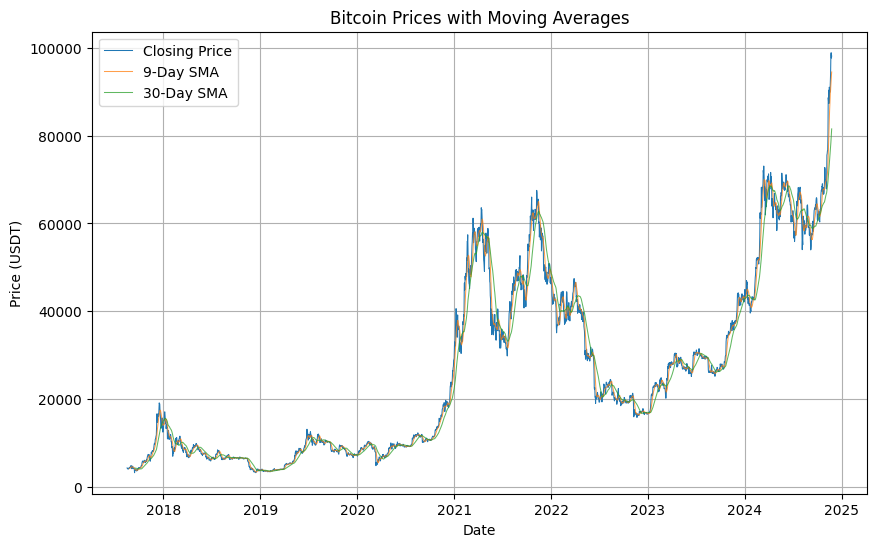

In [22]:
# Plot closing prices and moving averages
plt.figure(figsize=(10, 6))
plt.plot(BTC_USDT['close'], label='Closing Price', lw=0.75)
plt.plot(BTC_USDT['SMA_9'], label='9-Day SMA', lw=0.75, alpha=0.75)
plt.plot(BTC_USDT['SMA_30'], label='30-Day SMA', lw=0.75, alpha=0.75)
plt.title('Bitcoin Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()


This overlays the moving averages on the closing prices to visualize crossovers and trends.

## 7. Implement Trading Signals

In [23]:
# Generate trading signals based on moving average crossovers
BTC_USDT['signal'] = np.where(BTC_USDT['SMA_9'] > BTC_USDT['SMA_30'], 1.0, 0.0)
BTC_USDT['position'] = BTC_USDT['signal'].diff()

# Display signals
BTC_USDT[['SMA_9', 'SMA_30', 'signal', 'position']].tail()


,SMA_9,SMA_30,signal,position
date,,,,
2024-11-20,90465.467778,77404.473000,1.0,0.0
2024-11-21,91617.146667,78434.177000,1.0,0.0
2024-11-22,92563.457778,79508.288667,1.0,0.0
2024-11-23,93713.103333,80490.759333,1.0,0.0
2024-11-24,94502.283333,81538.638000,1.0,0.0


- `Signal`: Indicates whether to hold Bitcoin (`1`) or USDT (`0`).
- `Position`: Highlights when to buy (`1.0`) or sell (`-1.0`).

## 8. Backtest the Strategy

In [25]:
# Initial balance
initial_balance = 10000.0

# Compute daily returns and portfolio balance
BTC_USDT['BTC_return'] = BTC_USDT['close'] / BTC_USDT['close'].shift(1)
BTC_USDT['strategy_return'] = np.where(BTC_USDT['signal'] == 1, BTC_USDT['BTC_return'], 1.0)
BTC_USDT['balance'] = initial_balance * BTC_USDT['strategy_return'].cumprod()

# Display backtest results
BTC_USDT[['BTC_return', 'strategy_return', 'balance']].tail()


,BTC_return,strategy_return,balance
date,,,
2024-11-20,1.021403,1.021403,1.127385e+06
2024-11-21,1.042748,1.042748,1.175578e+06
2024-11-22,1.005847,1.005847,1.182452e+06
2024-11-23,0.987667,0.987667,1.167869e+06
2024-11-24,1.004733,1.004733,1.173397e+06


- Simulates portfolio performance based on the trading algorithm.
- Tracks the balance over time, assuming zero trading fees.

## 9. Visualize Backtest Performance

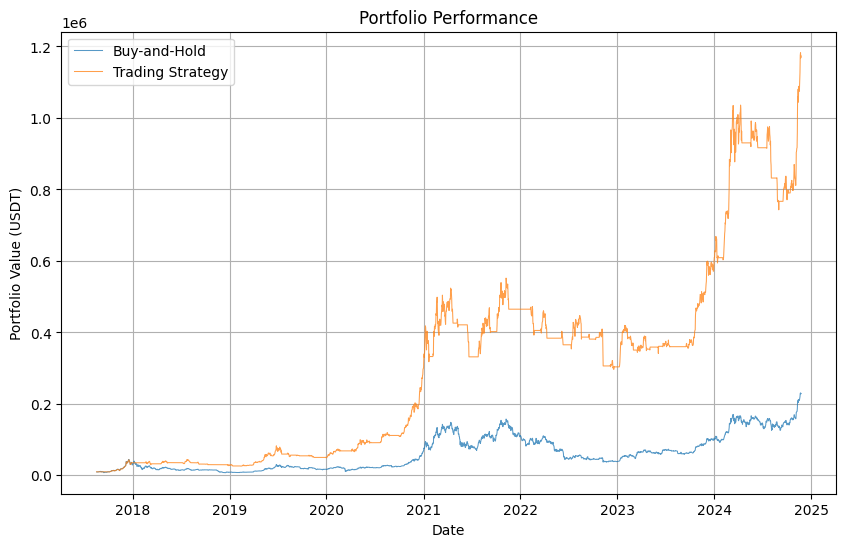

In [26]:
# Compare strategy performance with Buy-and-Hold
plt.figure(figsize=(10, 6))
plt.plot(initial_balance * BTC_USDT['BTC_return'].cumprod(), label='Buy-and-Hold', lw=0.75, alpha=0.75)
plt.plot(BTC_USDT['balance'], label='Trading Strategy', lw=0.75, alpha=0.75)
plt.title('Portfolio Performance')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.grid()
plt.show()


This compares the trading algorithm's performance with a baseline Buy-and-Hold strategy.

# 10. Insights and Next Steps

**Insights:**

- The Moving Average Crossover strategy successfully identifies buy/sell opportunities.
- Backtesting shows promising results, but outperformance depends on market conditions.
- Smoothing parameters (e.g., SMA windows) significantly impact outcomes.

**Next Steps:**

- Incorporate transaction fees for realistic evaluation.
- Experiment with other strategies (e.g., RSI, Bollinger Bands).